### Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

### Data Gathering

In [2]:

df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Problem Statment

In [ ]:
#predict whether the the user has heart disease or not

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: >

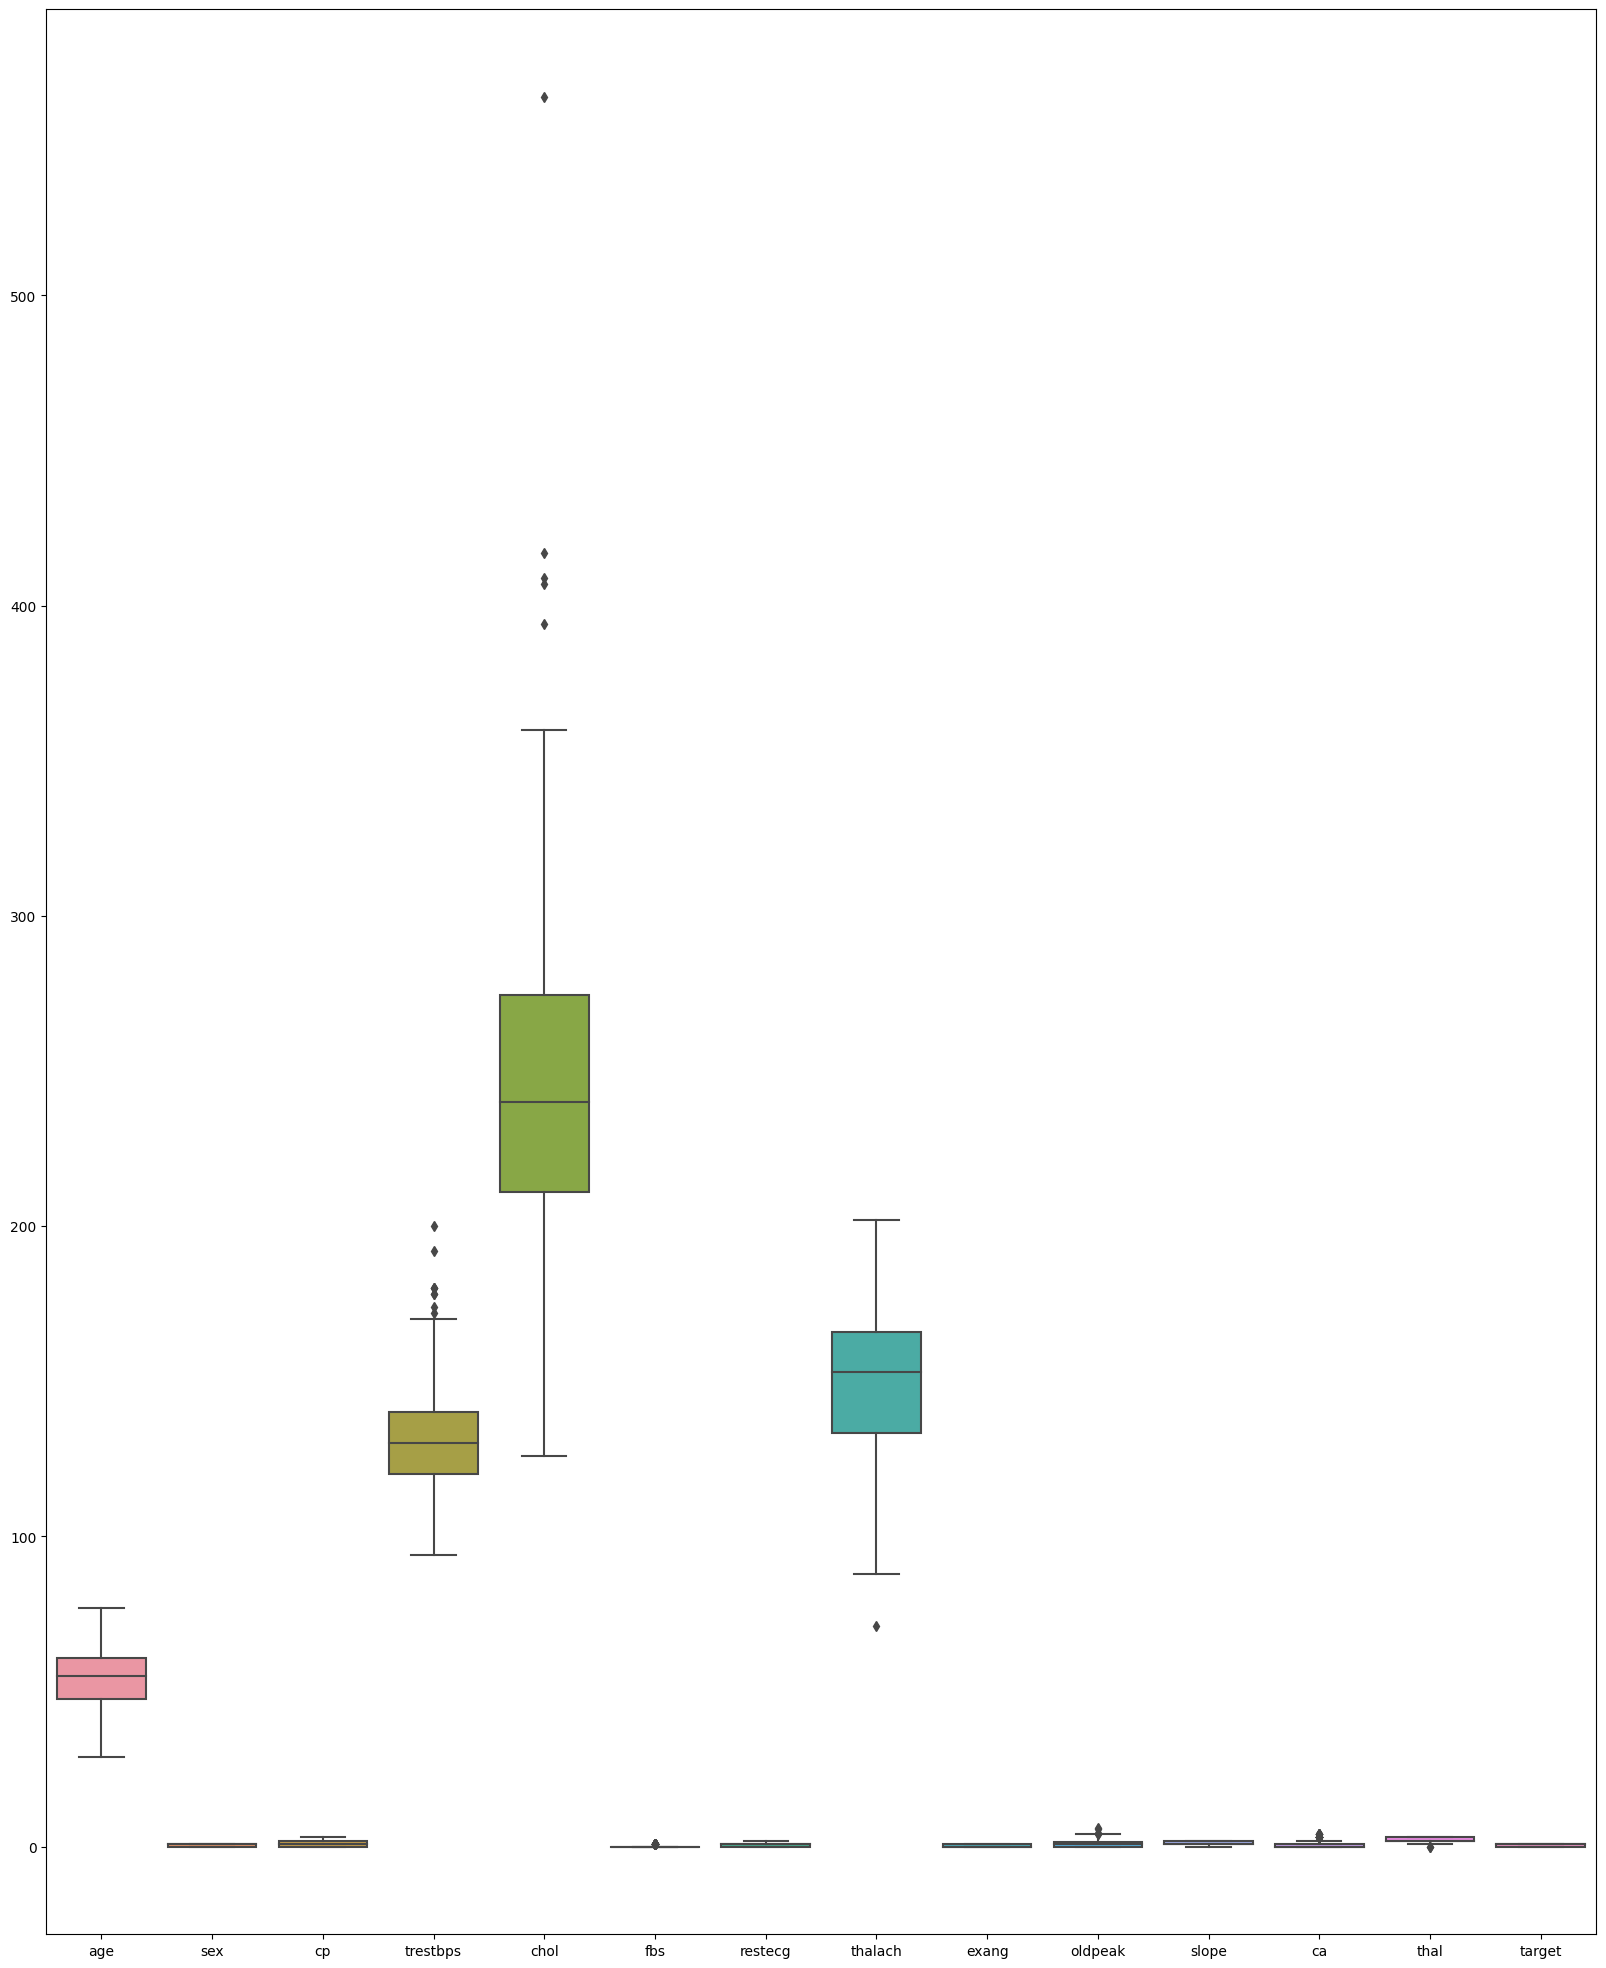

In [4]:
plt.figure(figsize=(20,25))
sns.boxplot(df) # some outliers are there so we replace outlier 

#### trestbps column

In [5]:

q1=df['trestbps'].describe()[4]
q2=df['trestbps'].describe()[5]
q3=df['trestbps'].describe()[6]
iqr=q3-q1
lf=q1-1.5*(iqr)
uf=q3+1.5*(iqr)

In [6]:
lf,uf

(90.0, 170.0)

In [7]:
np.where(df['trestbps']<lf)

(array([], dtype=int64),)

In [8]:
Max=df[df['trestbps']<uf].max()[3]
Max

165.0

In [9]:
df.loc[df['trestbps']>uf,"trestbps"]=Max

In [10]:
np.where(df['trestbps']>uf)

(array([], dtype=int64),)

#### chol column

In [11]:
q1=df['chol'].describe()[4]
q2=df['chol'].describe()[5]
q3=df['chol'].describe()[6]
iqr=q3-q1
lf=q1-1.5*(iqr)
uf=q3+1.5*(iqr)

In [12]:
lf,uf

(115.75, 369.75)

In [13]:
np.where(df['chol']>uf)    # index of outliere

(array([ 28,  85,  96, 220, 246], dtype=int64),)

In [14]:
maX=df.loc[df['chol']<uf,"chol"].max() 
maX                                    # calculate max of chol 

360

In [15]:
df.loc[df['chol']>uf,"chol"]=maX      # imputing outlier with max value

#### thalach column

In [16]:
q1=df['thalach'].describe()[4]
q2=df['thalach'].describe()[5]
q3=df['thalach'].describe()[6]
iqr=q3-q1
lf=q1-1.5*(iqr)
uf=q3+1.5*(iqr)

In [17]:
np.where(df['thalach']<lf)      # there is only one outlier

(array([272], dtype=int64),)

In [18]:
Min=df.loc[df['thalach']>lf,'thalach'].min()
Min#calculating mean value to replace outlier

88

In [19]:
df.loc[df['thalach']<lf,"thalach"]=Min

In [20]:
# othere column doen have that much outlier so we will go for dividing the independent and dependent variable

### Seperating Dependent and independent variable

In [21]:
X=df.drop('target',axis=1)
y=df['target']

### train test split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20,stratify=y)

In [23]:
x_train.shape

(242, 13)

In [24]:
y_train.shape

(242,)

### applying Logastic model

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


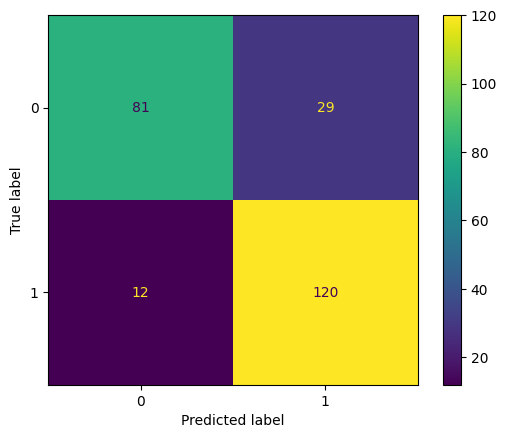

In [26]:
plot_confusion_matrix(model,x_train,y_train)

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


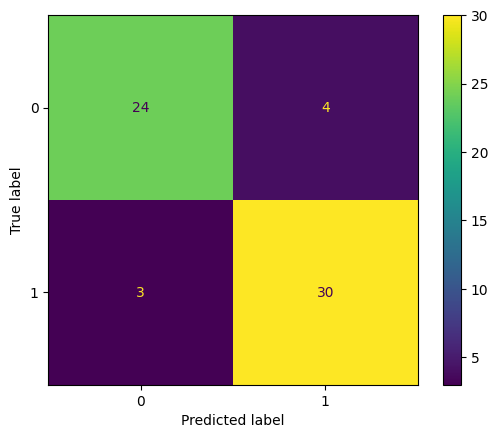

In [27]:
plot_confusion_matrix(model,x_test,y_test)

### evalution on testing data

In [28]:
y_pred=model.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
print('confusion_matrix',confusion_mat)
print("*"*89)
f1=f1_score(y_test,y_pred)
print('f1_score',f1)
print("*"*89)
accuracy =accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
print("*"*89)
class_report=classification_report(y_test,y_pred)
print("class_report",class_report)

confusion_matrix [[24  4]
 [ 3 30]]
*****************************************************************************************
f1_score 0.8955223880597014
*****************************************************************************************
accuracy 0.8852459016393442
*****************************************************************************************
class_report               precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### evalution on training data

In [29]:
y_predict=model.predict(x_train)

confusion_mat=confusion_matrix(y_train,y_predict)
print('confusion_matrix',confusion_mat)
print("*"*89)
f1=f1_score(y_train,y_predict)
print('f1_score',f1)
print("*"*89)
accuracy =accuracy_score(y_train,y_predict)
print("accuracy",accuracy)
print("*"*89)
class_report=classification_report(y_train,y_predict)
print("class_report",class_report)

confusion_matrix [[ 81  29]
 [ 12 120]]
*****************************************************************************************
f1_score 0.8540925266903915
*****************************************************************************************
accuracy 0.8305785123966942
*****************************************************************************************
class_report               precision    recall  f1-score   support

           0       0.87      0.74      0.80       110
           1       0.81      0.91      0.85       132

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.83       242
weighted avg       0.84      0.83      0.83       242



In [30]:
y_pred_prob=model.predict_proba(x_train)
fpr,tpr,thresh=roc_curve(y_train,y_pred_prob[:,1])

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) Curve')

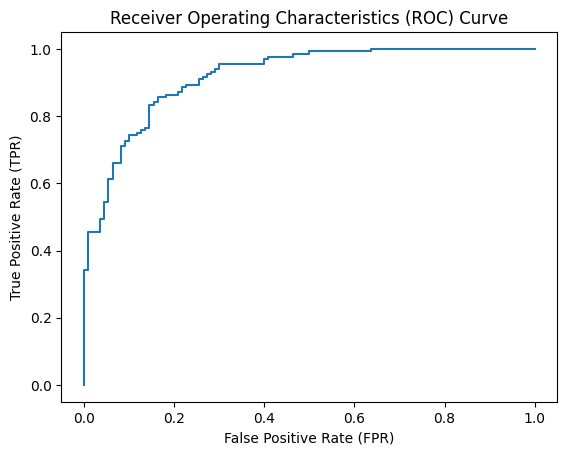

In [31]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristics (ROC) Curve")

In [32]:
thresh

array([1.99461265e+00, 9.94612651e-01, 9.22630659e-01, 9.20912818e-01,
       8.79891650e-01, 8.71425874e-01, 8.47956437e-01, 8.47859295e-01,
       8.20954842e-01, 8.15728925e-01, 7.83236438e-01, 7.78834414e-01,
       7.59993369e-01, 7.51526225e-01, 7.22965108e-01, 7.22667459e-01,
       7.14093909e-01, 6.97349021e-01, 6.95472170e-01, 6.86793488e-01,
       6.83908816e-01, 6.79709119e-01, 6.77982911e-01, 6.77579940e-01,
       6.76199590e-01, 6.73752005e-01, 6.66353964e-01, 6.54944408e-01,
       6.39534577e-01, 6.23333881e-01, 6.13230041e-01, 6.12996648e-01,
       5.94203818e-01, 5.90286753e-01, 5.84098932e-01, 5.65606177e-01,
       5.64362985e-01, 5.58827049e-01, 5.36237735e-01, 5.34994172e-01,
       5.30575597e-01, 5.13071989e-01, 5.05313340e-01, 5.01470627e-01,
       4.95326761e-01, 4.94088553e-01, 4.90643272e-01, 4.88273896e-01,
       4.80125421e-01, 4.68688023e-01, 4.48915999e-01, 3.89709779e-01,
       3.71662167e-01, 2.20936558e-01, 1.91535018e-01, 1.86838123e-01,
      

In [33]:
tpr[50]

0.9393939393939394

In [34]:
fpr[50]

0.2909090909090909

###  Testing on single row

In [35]:
df.tail(1).T

,302
age,57.0
sex,0.0
cp,1.0
trestbps,130.0
chol,236.0
fbs,0.0
restecg,0.0
thalach,174.0
exang,0.0
oldpeak,0.0


In [36]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [37]:
age=67
sex="male"
cp=1
trestbps=126
chol=312
fbs=1
restecg=0
thalach=188
exang=0
oldpeak=0
slope=1
ca=1
thal=1

In [38]:
array=np.zeros(X.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
json_data={"sex":{"male":1,"female":0},
            "columns":list(X.columns)}

In [40]:
array[0]=age
array[1]=json_data['sex'].get(sex)
array[2]=cp
array[3]=trestbps
array[4]=chol
array[5]=fbs
array[6]=restecg
array[7]=thalach
array[8]=exang
array[9]=oldpeak


In [41]:
model.predict([array])[0]

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [42]:
import pickle,json

In [43]:
# our model predict that the user has heart disease

In [44]:
with open("heart.pkl","wb") as f:
    pickle.dump(model,f)

In [45]:
with open("json_data.json","w") as m:
    json.dump(json_data,m)